In [1]:
# Sep 2020

# GPU GTX 1050TI
# Tensorflow-gpu 2.8.0
# Matplotlib 3.4.1

from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

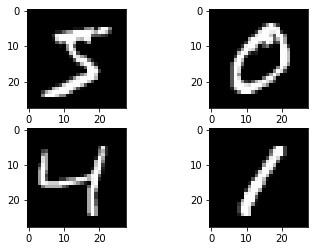

In [10]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [11]:
X_train = X_train / 255
X_test = X_test / 255

num_pixels = X_train.shape[1] * X_train.shape[2]
x_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

print(x_train.shape)

(60000, 784)


In [12]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

num_classes = y_test.shape[1]
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
def baseline_model():
    model = Sequential([
        Flatten(),
        Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'),
        Dense(num_classes, kernel_initializer='normal', activation='softmax')
    ])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
baseline_model = baseline_model()
baseline_history = baseline_model.fit(x_train,
                                      y_train,
                                      validation_data=(x_test,
                                                       y_test),
                                      epochs=10,
                                      batch_size=200,
                                      verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2751 - accuracy: 0.9232 - val_loss: 0.1467 - val_accuracy: 0.9572
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.1108 - accuracy: 0.9677 - val_loss: 0.0968 - val_accuracy: 0.9724
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0709 - accuracy: 0.9794 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9859 - val_loss: 0.0682 - val_accuracy: 0.9779
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.0646 - val_accuracy: 0.9810
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0260 - accuracy: 0.9930 - val_loss: 0.0641 - val_accuracy: 0.9798
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.0610 - val_accuracy: 0.9805
Epoch 

In [18]:
_, train_acc = baseline_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = baseline_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.981


In [37]:
def history_vizualization(history):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    fig.tight_layout()
    plt.show()

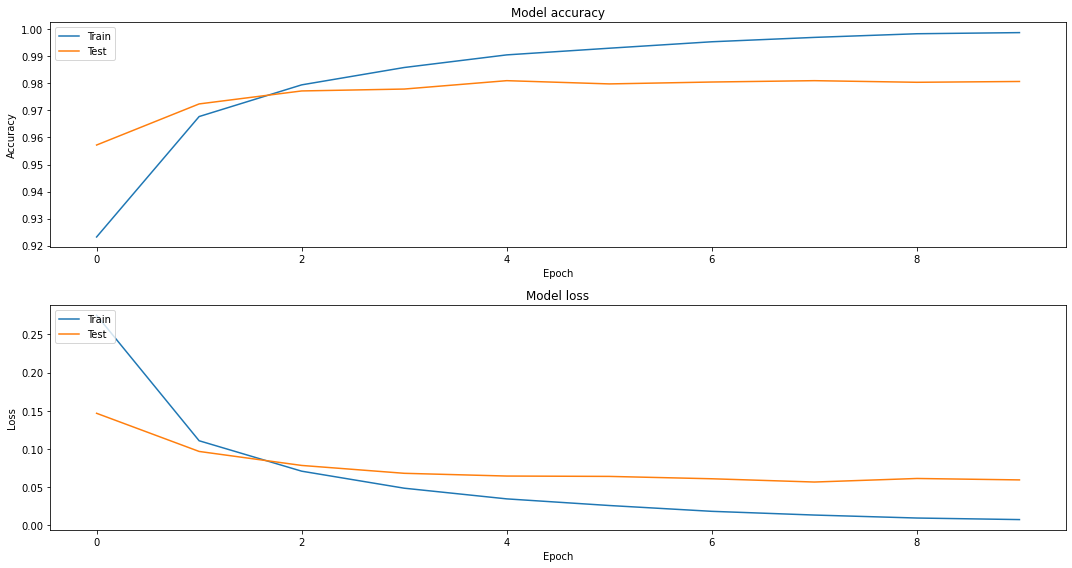

In [38]:
history_vizualization(baseline_history)

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
X_train = X_train / 255
X_test = X_test / 255

x_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [29]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [33]:
num_classes = y_test.shape[1]
def cnn_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
cnn_model = cnn_model()
cnn_history = cnn_model.fit(x_train,
                            y_train,
                            validation_data=(x_test,
                                             y_test),
                            epochs=5,
                            batch_size=200)

Epoch 1/5
300/300 [==============================] - 7s 18ms/step - loss: 0.3882 - accuracy: 0.8769 - val_loss: 0.0771 - val_accuracy: 0.9773
Epoch 2/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 3/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0407 - val_accuracy: 0.9866
Epoch 4/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0347 - val_accuracy: 0.9890
Epoch 5/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0369 - val_accuracy: 0.9881


In [35]:
_, train_acc = cnn_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.990, Test: 0.988


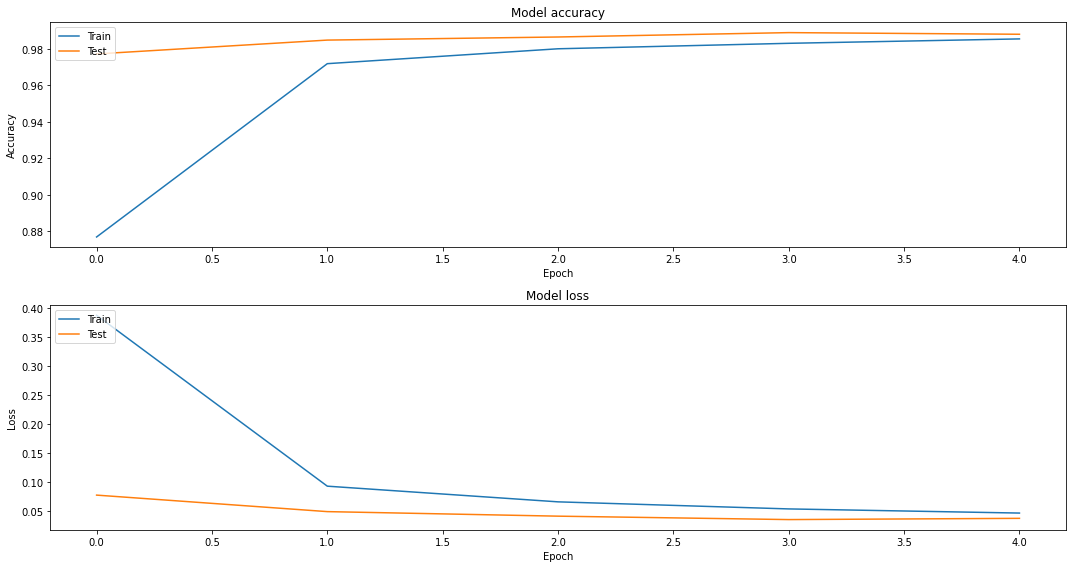

In [39]:
history_vizualization(cnn_history)